In [1]:
import numpy as np

def sum_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

t = np.array([0, 0, 1, 0, 0, 0, 0, 0,0,0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print((sum_squared_error(y, t)))

y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
print(sum_squared_error(y, t))

0.09750000000000003
0.5975


In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * (np.log(y + delta)))

t = np.array([0, 0, 1, 0, 0, 0, 0, 0,0,0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])

print((cross_entropy_error(y, t)))

y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
print(cross_entropy_error(y, t))

0.510825457099338
2.302584092994546


In [3]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [4]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

x_batch.shape, t_batch.shape

((10, 784), (10, 10))

In [5]:
np.random.choice(60000, 10)

array([41056, 55063, 38342, 25036, 53407, 48217, 31521, 35850,  8278,
       27202])

In [6]:
# label이 one-hot encoding일때
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) / batch_size

# label이 숫자 레이블로 주어졌을 때
def cross_entropy_error02(y, t):
    if y.ndim==1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [7]:
# 미분 나쁜 구현의 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(h)) / h

In [8]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [9]:
def function_1(x):
    return 0.01 * x**2 + 0.1*x

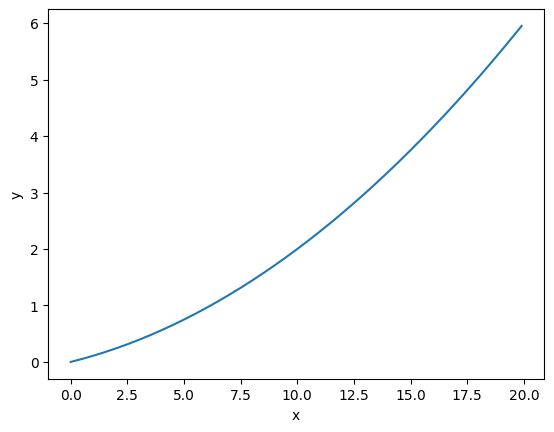

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.show()

In [11]:
numerical_diff(function_1, 5)

0.1999999999990898

In [12]:
numerical_diff(function_1, 10)

0.2999999999986347

0.1999999999990898


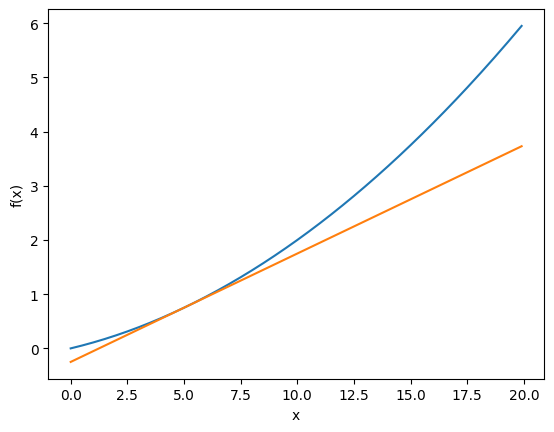

In [13]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()


In [14]:
# 편미분
def function_2(x):
    return x[0]**2 + x[1]**2



In [15]:
# x0=3, x1=4일때 x0에 대한 편미분
def function_tmp1(x0):
    return x0**2 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [16]:
def function_tmp2(x1):
    return 3.0**2.0 + x1**2

numerical_diff(function_tmp2, 4.0)

7.999999999999119

# Gradient

In [77]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [81]:
numerical_gradient(function_2, np.array([3.0, 4.0]))


array([6., 8.])

In [82]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [83]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

In [84]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [85]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [88]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2,  init_x, lr=0.1)

array([-6.11110793e-10,  8.14814391e-10])

In [89]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2,  init_x, lr=10)

array([-2.58983747e+13, -1.29524862e+12])

In [90]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2,  init_x, lr=1e-10)

array([-2.99999994,  3.99999992])

In [140]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet():
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [141]:
net = simpleNet()
net.W

array([[ 0.87268103, -0.93908413, -1.5510637 ],
       [-0.69331946,  1.053288  ,  0.89992612]])

In [142]:
x = np.array([0.6, 0.9])
p = net.predict(x)
p

array([-0.1003789 ,  0.38450872, -0.12070472])

In [143]:
np.argmax(p)

1

In [144]:
t = np.array([0, 0, 1])
loss = net.loss(x, t)
loss

1.3023342305167764

In [145]:
def f(W):
    return net.loss(x, t) 

dW = numerical_gradient(f, net.W) # net.W가 변화할때 f(==loss)의 순간 변화량(기울기) / # net.W에 접근해서 값을 바꿔가면서 gradient 구함
dW

array([[ 0.16648755,  0.27037452, -0.43686207],
       [ 0.24973132,  0.40556179, -0.6552931 ]])

In [128]:
# temp = np.array([0, 1, 4])
# def tmp_function(x):
#     x += 1
#     return x

In [139]:
# tmp_function(temp)
# temp

array([11, 12, 15])

In [147]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
dW

array([[ 0.16648755,  0.27037452, -0.43686207],
       [ 0.24973132,  0.40556179, -0.6552931 ]])

In [166]:
# 2층 신경만 클래스 구현하기

import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet():
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        z1 = np.dot(x, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        y = softmax(z2)
        
        return y
    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W : self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [167]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)


(784, 100)
(100,)
(100, 10)
(10,)


In [168]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [170]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)


(784, 100)
(100,)
(100, 10)
(10,)


In [179]:
net.params['W1']

array([[-1.45809984e-02, -2.33007164e-03, -1.17488043e-02, ...,
        -2.14001416e-03, -1.41450736e-02, -1.26063115e-02],
       [-5.62409850e-04, -2.77920798e-02,  1.74576638e-02, ...,
        -4.91589570e-04,  1.21254496e-02,  3.85625234e-03],
       [ 1.56338796e-03, -1.55482725e-02, -2.04685025e-03, ...,
        -1.54918908e-02, -3.19090009e-05,  1.61115644e-02],
       ...,
       [-2.93039931e-04,  5.71338871e-03, -7.05569503e-03, ...,
         8.14703971e-03, -6.66429336e-03,  5.29185349e-03],
       [-8.83818007e-03, -7.33689970e-03, -1.62202547e-02, ...,
         1.15883529e-02, -7.05417642e-03, -5.58998552e-03],
       [-5.51529399e-05,  1.48386805e-02, -8.34755982e-03, ...,
        -6.98767125e-03, -9.86244408e-03,  1.98828093e-02]])

In [186]:
%%time
# 미니배치 학습 구현하기

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []

# 하이퍼 파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # gradient 계산
    grad = network.gradient(x_batch, t_batch)
    
    # 파라미터 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

CPU times: total: 5.25 s
Wall time: 20 s


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

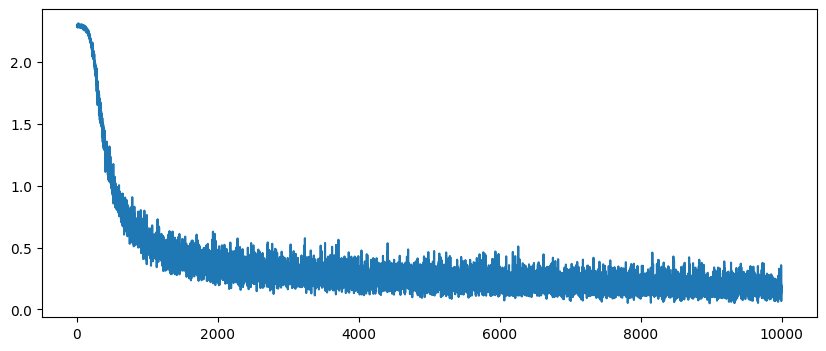

In [193]:
plt.figure(figsize=(10, 4))
plt.plot(train_loss_list)

In [198]:
# 시험 데이터로 평가하기
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size = 50, output_size = 10)

# 하이퍼 파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size/batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 그라디언트 계산
    grads = network.gradient(x_batch, t_batch)
    
    # 파라미터 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grads[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_batch, t_batch)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f'epoch #{int(i//iter_per_epoch)} train acc, test_acc | {str(train_acc)}, {str(test_acc)}') 

epoch #0 train acc, test_acc | 0.13, 0.1028
epoch #1 train acc, test_acc | 0.85, 0.8037
epoch #2 train acc, test_acc | 0.92, 0.8798
epoch #3 train acc, test_acc | 0.93, 0.9
epoch #4 train acc, test_acc | 0.97, 0.9111
epoch #5 train acc, test_acc | 0.9, 0.9167
epoch #6 train acc, test_acc | 0.9, 0.9212
epoch #7 train acc, test_acc | 0.9, 0.926
epoch #8 train acc, test_acc | 0.92, 0.9284
epoch #9 train acc, test_acc | 0.93, 0.9316
epoch #10 train acc, test_acc | 0.93, 0.9337
epoch #11 train acc, test_acc | 0.94, 0.9355
epoch #12 train acc, test_acc | 0.97, 0.9389
epoch #13 train acc, test_acc | 0.93, 0.9405
epoch #14 train acc, test_acc | 0.93, 0.9413
epoch #15 train acc, test_acc | 0.95, 0.9426
epoch #16 train acc, test_acc | 0.95, 0.9451


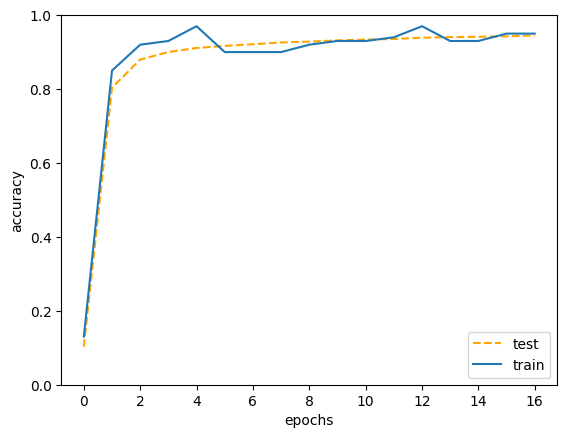

In [207]:
plt.ylim(0, 1)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(test_acc_list, '--', color='orange', label='test')
plt.plot(train_acc_list, label='train')
plt.legend()